## 모델 평가와 검증

### k-겹 교차 검증
* k-fold cross-validation)
* 여러번 훈련 셑과 테스트 셑으로 나누는 것
* 데이타 셑을 k개로 나눔
* k번 반복
* 매 반복 마다 훈련 셑과 데스트 셑 역할 변경
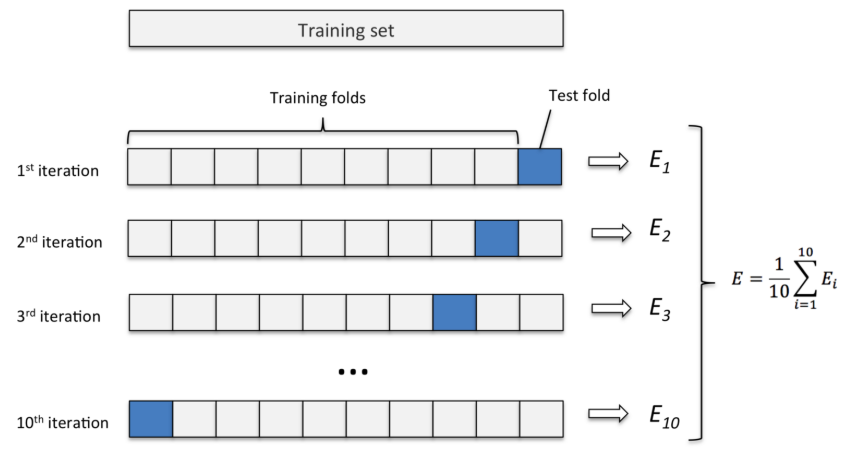    

### 교차 검증의 장점
* 모델 성능이 분할에 따라 편차가 큰경우 탁월
* 전체 데이타 셑에서 훈련 셑의 비중을 높인다.
    * k-fold가 클 수록 훈련 셑 비중 증가
    * 5-fold : 4/5(80%)
    * 10-fold : 9/10(90%)
    * 연산 비용 k배 증가
    

### scikit-learn의 교차 검증
* `scores = model_selection.cross_val_score(model, train_data, target, cv=3)`
    * k-fold 교차 검증 실행, __*훈련은 되지 않음*__
    * model : 평가하려는 모델
    * train_data : 훈련 데이타 셑
    * target : 레이블
    * cv=3 : k fold 지정, 기본 값=3
    * scores : k 개의 배열 결과
    
* k개의 결과의 평균
    * `scores.mean()`


### scikit-learn 교차검증 예제

In [68]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [61]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
model = LogisticRegression()

scores = cross_val_score(model, iris.data, iris.target, cv=5)
print("교차 검증 점수:", scores)
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 점수: [1.         0.96666667 0.93333333 0.9        1.        ]
교차 검증 평균 점수: 0.96


### 계층별 k-겹 교차 검증
* stratified k-fold cross-validation
* 분류 모델의 교차 검증
* 폴드 안의 클래스 비율이 전체 데이타셑의 클래스 비율과 같게 분할
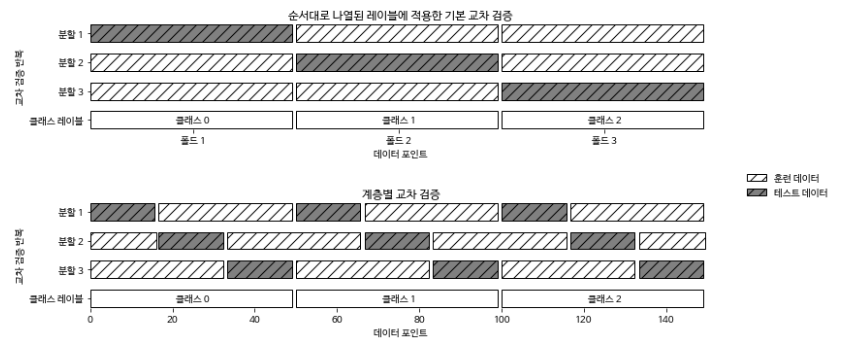

### sklearn 교차 검증 상세 옵션
* `model_selection.KFold`
    * 상세 옵션 객체
    * n_splits : k fold 갯수
    * shuffle : 섞기
    * random_state : 랜덤수 시드 값

#### iris 데이타 교차 검증 실퍠 사례

In [62]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
scores = cross_val_score(model, iris.data, iris.target, cv=kfold)
print("교차 검증 점수:", scores)
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 점수: [0. 0. 0.]
교차 검증 평균 점수: 0.00


#### Iris 데이타 셔플링 사례

In [63]:

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("교차 검증 점수:\n",
    cross_val_score(model, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.9  0.96 0.96]


### 임의 분할 교차 검증
* shuffle-split corss-validation
* train_size 만큼만 훈련 셑트 생성
* test_size 만큼 테스트 세트 생성
* 임의로 셔플링
* `model_selection.ShuffleSplit(test_size, train_size, n_splits)`
    * test_size : 훈련세트 갯수(int) 또는 비율(float)
    * train_size : 테스트 세트 갯수(int) 또는 비율(float)
    * n_splits : 반복 횟수

#### 임의분할 교차 예제 

In [64]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.96       0.96       0.94666667 0.97333333 0.93333333 0.86666667
 0.92       0.94666667 0.93333333 0.96      ]


### 교차 검증 추가 정보

* `ret = model_selection.cross_validate(model, train_data, target, cv, return_train_score)`
    * 훈련 검증 점수 이외의 추가 정보 반환
    * 훈련 시간, 검증 시간, 테스트 검증 점수, 훈련 검증 점수

In [65]:
import pandas as pd
from sklearn.model_selection import cross_validate
res = cross_validate(model, iris.data, iris.target, cv=5,
                     return_train_score=True)

print(res)
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

{'fit_time': array([0.00184798, 0.00110722, 0.00083804, 0.00124335, 0.00085902]), 'score_time': array([0.00058103, 0.00034285, 0.00037909, 0.00059485, 0.00030899]), 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]), 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}


,fit_time,score_time,test_score,train_score
0,0.001848,0.000581,1.000000,0.950000
1,0.001107,0.000343,0.966667,0.966667
2,0.000838,0.000379,0.933333,0.966667
3,0.001243,0.000595,0.900000,0.975000
4,0.000859,0.000309,1.000000,0.958333


평균 시간과 점수:
 fit_time       0.001179
score_time     0.000441
test_score     0.960000
train_score    0.963333
dtype: float64


## 그리드 서치

### 그리드 서치
* grid search
* 알고리즘의 매개변수를 조정하여 일반화 성능을 최대화

### SVM의 매개변수 그리드 서치
* gamma, C 매개변수
* 6가지 변수 적용
    * 0.001, 0.01, 0.1, 1, 10, 100
    * 총 36가지
    

### Iris 데이타와 SVC의 간단한 그리드 서치 예제

In [33]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        score = svm.score(X_test, y_test)
        print("C:{:3.3f},\t gamma:{:3.3f},\t score:{:.2f}".format(C, gamma, score))
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)


훈련 세트의 크기: 112   테스트 세트의 크기: 38
C:0.001,	 gamma:0.001,	 score:0.24
C:0.010,	 gamma:0.001,	 score:0.24
C:0.100,	 gamma:0.001,	 score:0.24
C:1.000,	 gamma:0.001,	 score:0.58
C:10.000,	 gamma:0.001,	 score:0.92
C:100.000,	 gamma:0.001,	 score:0.97
C:0.001,	 gamma:0.010,	 score:0.24
C:0.010,	 gamma:0.010,	 score:0.24
C:0.100,	 gamma:0.010,	 score:0.58
C:1.000,	 gamma:0.010,	 score:0.92
C:10.000,	 gamma:0.010,	 score:0.97
C:100.000,	 gamma:0.010,	 score:0.97
C:0.001,	 gamma:0.100,	 score:0.24
C:0.010,	 gamma:0.100,	 score:0.24
C:0.100,	 gamma:0.100,	 score:0.92
C:1.000,	 gamma:0.100,	 score:0.97
C:10.000,	 gamma:0.100,	 score:0.97
C:100.000,	 gamma:0.100,	 score:0.95
C:0.001,	 gamma:1.000,	 score:0.24
C:0.010,	 gamma:1.000,	 score:0.24
C:0.100,	 gamma:1.000,	 score:0.97
C:1.000,	 gamma:1.000,	 score:0.97
C:10.000,	 gamma:1.000,	 score:0.97
C:100.000,	 gamma:1.000,	 score:0.97
C:0.001,	 gamma:10.000,	 score:0.24
C:0.010,	 gamma:10.000,	 score:0.24
C:0.100,	 gamma:10.000,	 score:0.29
C:1.000,

### 검증 셑
* validation set
* 매개변수 조정을 위한 테스트 셑
* 모델 평가에 사용 불가
* 새로운 독립된 데이타 검증 세트 필요
* 데이타 셑을 3가지로 분할
    * 훈련 셑(trainning set) : 모델 훈련 생성
    * 검증 셑(validation set) : 매개변수(hyper-paramter) 선택 및 튜닝
    * 테스트 셑(test set) : 모델 성능 평가
* 최적의 매개변수 선택후 훈련 셑과 검증 셑을 통합해서 새로 훈련
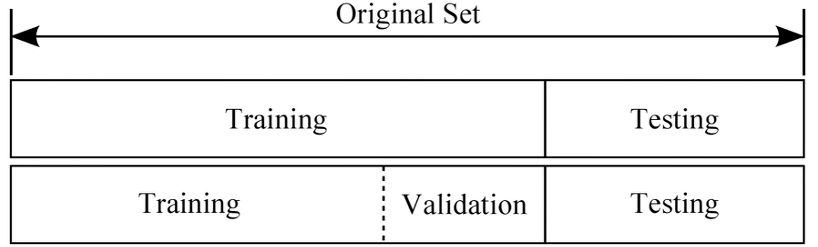

#### 검증 셑을 이용한 그리드 서치 예제

In [35]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


### 교차 검증을 사용한 그리드 서치
* k-fold 교차 검증을 매개변수 평가에 적용
* 데이터 분할에 민감한 경우

In [38]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = scores.mean()
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.97
최적 파라미터:  {'C': 100, 'gamma': 0.01}
최적 파라미터에서 테스트 세트 점수: 0.97


### GridSearchCV 클래스
* 교차검증을 적용한 그리드 서치 scikit-learn 구현 클래스
* 딕셔너리로 매개변수 이름과 설정 값 지정
* `model_selection.GridSearchCV(model, param_grid, cv, return_train_score)`
    * `model` : 사용할 알고리즘 구현 모델
    * `param_grid` : 매개변수 설정 딕셔너리
* `fit()`, `predict()`, `score()` 함수 제공
* `best_estimator_`에 원본 모델 객체 저장

#### GridserachCV 예제

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
grid_search.fit(X_train, y_train)
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))
print("최고 성능 모델:\n", grid_search.best_estimator_)

테스트 세트 점수: 0.97
최적 매개변수: {'C': 100, 'gamma': 0.01}
최고 교차 검증 점수: 0.97
최고 성능 모델:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 교차 검증 결과 분석
* `grid_search.cv_results_` : 그리드 서치 결과 정보 저장

In [45]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
#results.head()
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.00105538,0.0008183,0.000851917,0.00085969,0.000849962
std_fit_time,0.000305301,4.8025e-05,6.59667e-05,6.05178e-05,5.01942e-05
mean_score_time,0.000592899,0.000424242,0.000436449,0.000415134,0.000393248
std_score_time,0.000162523,2.81478e-05,5.94956e-05,1.20305e-05,8.3842e-06
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.375,0.375,0.375,0.375,0.375
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


#### 교차 검증 평균 점수 히트맵

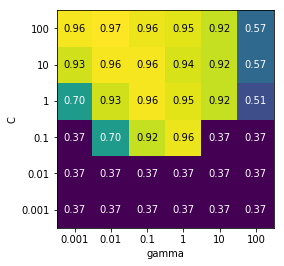

In [53]:
%matplotlib inline
import mglearn

scores = np.array(results.mean_test_score).reshape(6,6)
scores

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

#### 다양한 매개변수 그리드
* 잘 못된 매개변수 범위 

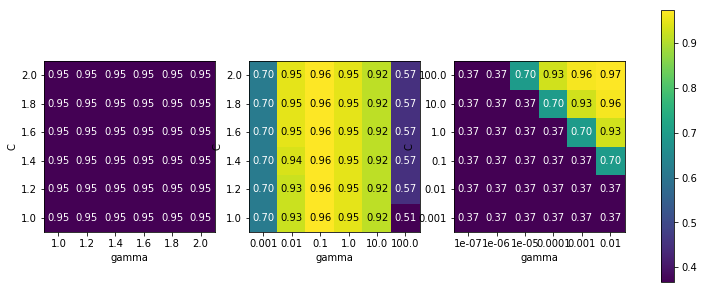

In [70]:
import matplotlib.pylab as plt
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

### 비대칭 매개변수
* `GridSearchCV`에 전달한 매개변수가 다른 경우
* SVC의 kernel에 따른 매개변수 차이
    * linear kernel : C 매개변수
    * rbf 커널 : C, gamma 매개변수
* 딕셔너리의 리스트로 전달

#### 비대칭 매개변수 예제

In [71]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


#### 비대칭 매개변수 결과

In [75]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head().T)
display(results.tail().T)

,0,1,2,3,4
mean_fit_time,0.000848627,0.00106559,0.000875139,0.00117097,0.000972223
std_fit_time,0.000136843,0.000335984,0.00012764,0.000167365,0.00022942
mean_score_time,0.000579214,0.00045557,0.000432348,0.000784922,0.000481796
std_score_time,0.000324674,6.40182e-05,4.57124e-05,0.000249134,0.000136762
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
param_kernel,rbf,rbf,rbf,rbf,rbf
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826


,37,38,39,40,41
mean_fit_time,0.000559282,0.000541878,0.000629807,0.00049119,0.000557709
std_fit_time,2.48413e-06,8.82491e-05,0.00022658,1.87218e-05,8.63833e-05
mean_score_time,0.00032053,0.000318336,0.000376081,0.000308418,0.000327015
std_score_time,1.64215e-06,5.74069e-06,0.000106536,7.62939e-07,3.61399e-05
param_C,0.01,0.1,1,10,100
param_gamma,NaN,NaN,NaN,NaN,NaN
param_kernel,linear,linear,linear,linear,linear
params,"{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.826087,0.913043,0.956522,1,1


## 평가 지표와 측정

### 이진 분류 평가지표
* 에러의 종류
    * 거짓 양성(false positive) : 음성을 양성으로 판단
        * 타입 1에러
    * 거짓 음성(false negative) : 양성을 음성으로 판단
        * 타입 2에러
* 사용하는 분야에 따라 2가지 에러의 중요성이 다름
    * 암 진단 : 거짓 음성이 더 큰 문제
    * 어린이 비디오 : 거짓 양성이 더 큰 문제
* 불균형 데이타 셑
    * imbalanced datasets
    * 샘플에서 양성 클래스와 음성 클래스 비중이 한쪽으로 치우친 경우
    * 예) 직진, 좌회전, 우회전 중에 직진이 90% 이상인 샘플
    * 현실적인 데이타

#### 불균형 데이타 셑 예제
* 숫자 손글씨를 9와 9가 아닌것으로 나눔
* Dummy 분류기의 정확도

In [77]:
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


### 오차 행렬
* confusion matrix
* 실제 양성/음성 클래스와 예측된 양성/음성 클래스를 교차해서 표시
* 양성과 음성 클래스의 오류를 행렬로 표현
    * 음성 클래스 : 진짜 음성(TN:True Negative), 거짓 양성(FP:False Positive)
    * 양성 클래스 : 거짓 음성(FN:False Negative), 진짜 양성(TP:True Positive)
* 대각 행렬이 정확한 분류
* 나머지 항목은 잘못된 분류
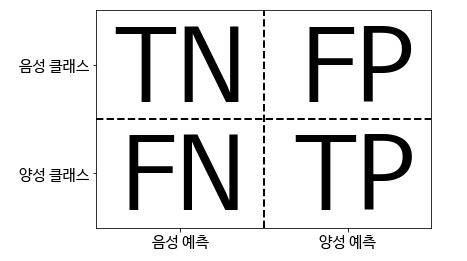
* `sklern.metrics`
    * `confusion = confusion_matrix(y, predict)`
        * `y` : 레이블
        * `predict` : 평가할 모델의 예측값

#### 오차 행렬 예시
* 9와 나머지로 분류된 숫자 손글씨를 선형회귀 모델로 평가

logreg 점수: 0.98
오차 행렬:
 [[401   2]
 [  8  39]]


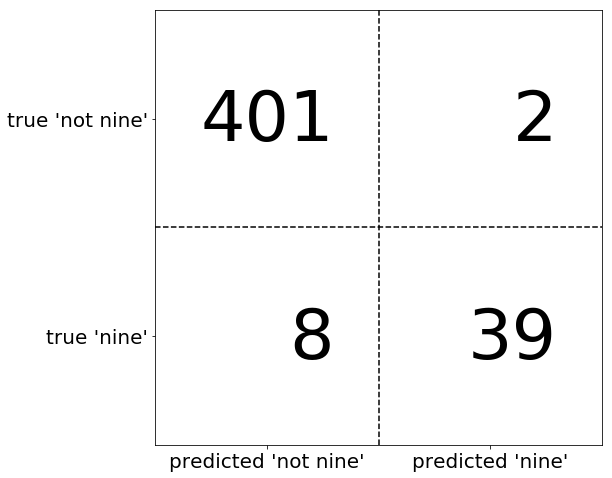

In [80]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)
mglearn.plots.plot_confusion_matrix_illustration()


#### 여러가지 모델에 따른 오차 행렬 예제
* 빈도 기반 더미 모델
* 무작위 더미 모델
* 결정 트리 모델
* 로지스틱 회귀

In [84]:
from sklearn.tree import DecisionTreeClassifier
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)#

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[367  36]
 [ 43   4]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[401   2]
 [  8  39]]


## 오차행렬의 요약
* 정확도 : 얼마나 정확히 예측 하는가? 전체 샘플 중 정확히 예측한 갯수의 비율
    * $\displaystyle 정확도 = \frac{TP+TN}{TP+TN+FP+FN}$
* 정밀도(precision) : 양성으로 예측된 샘플 중 정확히 예측한 양성 갯수의 비율
    * $\displaystyle 정밀도 = \frac{TP}{TP+FP}$
    * 거짓 양성의 수를 줄이는 것이 목표일 때 성능 지표
* 재현율(recall) : 전체 양성 클래스 샘플 중 양성으로 분류되는 비율
    * $\displaystyle 재현율 = \frac{TP}{TP+FN}$
    * 거짓 음성을 피하는 것이 목표일 때 성능 지표
* $F_1$-점수(F-score)
    * 정밀도와 재현율 최적화는 상충
    * 정밀도와 재현율을 요약
    * 조화 평균
    * $\displaystyle F_1 = 2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}$
* `sklean.metrics`
    * `f1_score(y, predcit)` : $F_1$ 점수 측정
    * `classification_report(y, predict, target_names` : 정밀도, 재현율, $F_1$ 점수 출력 

#### 여러가지 모델에 따른 F1 점수 예제

In [85]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.09
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


/Users/rainer/Dropbox/work/ml_dl/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 여러가지 모델에 따른 classification_report 점수 예제

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      0.91      0.90       403
           9       0.10      0.09      0.09        47

   micro avg       0.82      0.82      0.82       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.82      0.82       450



In [89]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



### 재현율-정밀도 곡선
* 결정 임계 값 : 분류기의 0과1을 구분하는 기준 값
    * `model.decision_function()` : 0
    * `model.predict_prob()` : 0.5
* 결정 임계값(threshold)에 따른 재현율-정밀도 곡선

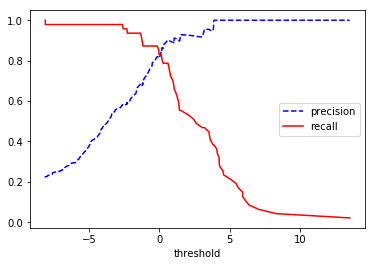

In [113]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(logreg, X_test, y_test, cv=3, method='decision_function')

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "r-", label="recall")
plt.xlabel('threshold')
plt.legend(loc='center right')

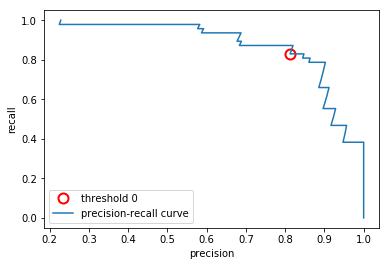

In [114]:
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precisions[close_zero], recalls[close_zero], 'o', markersize=10,
         label="threshold 0", fillstyle="none", c='r', mew=2)

plt.plot(precisions, recalls, label="precision-recall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")


#### Logistic, Decision Tree 비교
* 정밀도와 재현율이 높게 유지 되는 모델이 좋다.

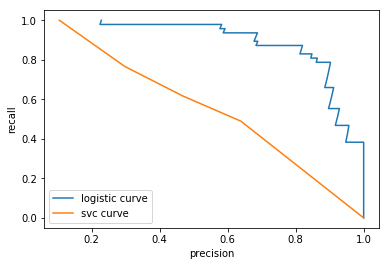

In [124]:
precision_svc, recall_svc, thresholds = precision_recall_curve(
    y_test, tree.predict_proba(X_test)[:,1])

plt.plot(precisions, recalls, label="logistic curve")
plt.plot(precision_svc, recall_svc, label="svc curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best")




### ROC 곡선
* Receiver Operating Characteristic
* 수신기 조작 특성
* 진짜 양성 비율(TPR)에 대한 거짓 양성 비율(FPR)
    * $\displaystyle FPR = \frac{FP}{FP+TN}$
* 왼쪽 위에 가까울 수록 이상적
* `sklearn.metrics`
    * roc_curve(y, decision_function)

#### ROC 곡선 예제

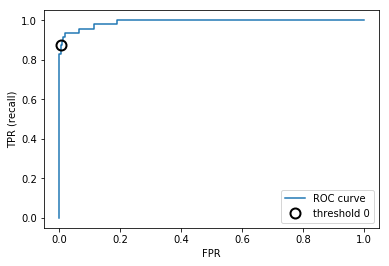

In [126]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

### 다중 분류 평가 지표
* 이진 분류 평가 그대로 적용


#### 다중 분류 오차 행렬 예제

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


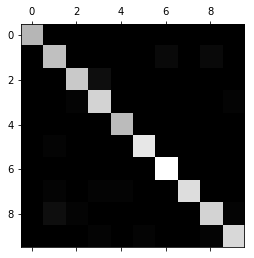

In [130]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))
plt.matshow(confusion_matrix(y_test, pred), cmap='gray')

#### 다중 분류 F1 점수 예제

In [128]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



### F1 평균 점수
* macro 평균 : 모든 클래스를 같은 비중으로 평균 계산
* weighted 평균 : 클래스별 샘플 수를 가중치로 평균 계산

In [131]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954
